# Text normalization cont.
Last time we finished with some text normalization activities like stemming and normalization (removing [inflectional](https://en.wikipedia.org/wiki/Inflection) affixes**(ed, ing, ize, s, de)**).

Note that 

- stemming can result in a word not in the dictionary.
- Lemmatization ensures word is in dictionary.
- stemming is a fast process compared to lemmatization.


We can use use both the techniques to further reduction

In [121]:
import nltk
import pandas as pd
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [122]:
nltk.download('all')  # get nltk database

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ddalton\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\ddalton\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\ddalton\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\ddalton\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\ddalton\AppData\Roaming\nltk_data...
[nltk_d

True

In [123]:
ps = PorterStemmer()
word= 'muses'
print(ps.stem(word))  # stem word for muses

muse


In [124]:
word= 'geese'
print(ps.stem(word))  # stem word for geese

gees


In [125]:
wn_lm= WordNetLemmatizer()
lm_word = wn_lm.lemmatize(word)
print(lm_word)
print(ps.stem(lm_word))

goose
goos


# Expanding contractions

This activity invloves replacing contractions with full words like
- can't with cannot.
- Should've with should have
- Weren't were not
- 


# Any suggestion how to do it? What module and function?

In [126]:
import re
contraction_patterns=[(r'can\'t', 'cannot'),
                    (r'haven\'t', 'have not'),
                    (r'(\w+)\'ll', '\g<1> will'),
                    (r'(\w+)\'re', '\g<1> are')]


In [127]:
class contraction_replacer(object):
    def __init__(self, contraction_patterns):        
        # store compiled regex object
        self._contraction_regexes = [(re.compile(p), replaced_text) for p, replaced_text in contraction_patterns]
        
    def do_contraction_normalization(self, text):
        for contraction_regex, replaced_text in self._contraction_regexes:
            text = contraction_regex.sub(replaced_text, text)
        return text     


**Let's use it**

In [128]:
sample_contraction_replacer = contraction_replacer(contraction_patterns)

In [129]:
sample_contraction_replacer.do_contraction_normalization("We'll make this work")

'We will make this work'

In [130]:
# Removing contraction and tokenize
nltk.tokenize.word_tokenize(sample_contraction_replacer.do_contraction_normalization("We'll make this work"))

['We', 'will', 'make', 'this', 'work']

# Removing repeated words

In [131]:
class repeat_replacer(object):
    def __init__(self, repeat_patterns, sub_pattern):       
        
        # store compiled regex object
        self._repeat_regexes = re.compile(repeat_patterns)
        self._sub_pattern = sub_pattern
    def do_repeat_normalization(self, word):
        compressed_word = self._repeat_regexes.sub(self._sub_pattern, word)
        if compressed_word != word:
            compressed_word = self.do_repeat_normalization(compressed_word)
            
        
        return compressed_word

In [132]:
# Notice how backreferences(\1, \2, \3) are used  I looove loove love 
sample_repeat_replacer = repeat_replacer(r'(\w*)(\w)\2(\w*)', r'\1\2\3' )


In [133]:
sample_repeat_replacer.do_repeat_normalization('ooooh'), sample_repeat_replacer.do_repeat_normalization('loooove')

('oh', 'love')

What happens when word has repeating character!!!

In [134]:
sample_repeat_replacer.do_repeat_normalization('sheep')

'shep'

In [135]:
from nltk.corpus import wordnet
class repeat_replacer(object):
    def __init__(self, repeat_patterns, sub_pattern):
        # store compiled regex object
        self._repeat_regexes = re.compile(repeat_patterns)
        self._sub_pattern = sub_pattern
    def do_repeat_normalization(self, word):
        if wordnet.synsets(word):
            return word
        compressed_word = self._repeat_regexes.sub(self._sub_pattern, word)
        if compressed_word != word:
            #print('iside if')
            compressed_word = self.do_repeat_normalization(compressed_word)
        return compressed_word

In [136]:
repeat_replacer_inst = repeat_replacer(r'(\w*)(\w)\2(\w*)', r'\1\2\3')

In [137]:
repeat_replacer_inst.do_repeat_normalization('sheep')

'sheep'

In [138]:
repeat_replacer_inst.do_repeat_normalization('ooooh'), repeat_replacer_inst.do_repeat_normalization('loooove')

('ooh', 'love')

# Spelling correction with Enchant

Go to 
http://www.abisource.com/projects/enchant/ 
to learn more

In [139]:
#You may get an error about the C libraries. To solve that issue, use HomeBrew (quick Google search)
# brew update
# brew install enchant

# conda only can install linux version, use pip for windows
# !pip install pyenchant

# To build a spell checker class we need
- a spellchecking library like enchant. We just installed it
- and a dictionary for it to use


# Let' see how enchant works

In [140]:
import enchant
enchant.list_dicts()


[('en_BW', <Enchant: Hunspell Provider>),
 ('en_AU', <Enchant: Hunspell Provider>),
 ('en_BZ', <Enchant: Hunspell Provider>),
 ('en_GB', <Enchant: Hunspell Provider>),
 ('en_JM', <Enchant: Hunspell Provider>),
 ('en_DK', <Enchant: Hunspell Provider>),
 ('en_HK', <Enchant: Hunspell Provider>),
 ('en_GH', <Enchant: Hunspell Provider>),
 ('en_US', <Enchant: Hunspell Provider>),
 ('en_ZA', <Enchant: Hunspell Provider>),
 ('en_ZW', <Enchant: Hunspell Provider>),
 ('en_SG', <Enchant: Hunspell Provider>),
 ('en_NZ', <Enchant: Hunspell Provider>),
 ('en_BS', <Enchant: Hunspell Provider>),
 ('en_AG', <Enchant: Hunspell Provider>),
 ('en_PH', <Enchant: Hunspell Provider>),
 ('en_IE', <Enchant: Hunspell Provider>),
 ('en_NA', <Enchant: Hunspell Provider>),
 ('en_TT', <Enchant: Hunspell Provider>),
 ('en_IN', <Enchant: Hunspell Provider>),
 ('en_NG', <Enchant: Hunspell Provider>),
 ('en_CA', <Enchant: Hunspell Provider>)]

In [141]:
#Import the English dictionary
dict_int = enchant.Dict('en')

#Check if the words 'love' and 'lov' exist in the dictionary
dict_int.check('love'), dict_int.check('lov')

(True, False)

In [142]:
#Let's check the suggestions for the word 'scien'
dict_int.suggest('scien')

['scion', 'sci en', 'sci-en', 'science']

# How edit distance works

*minimum number of character changes to transform one word into another.*

See wiki for details
https://en.wikipedia.org/wiki/Edit_distance

In [143]:
from nltk.metrics import edit_distance

#What is the distance between these two words ?
edit_distance('sciena', 'science')

2

# Let's write the class for performing spell correction
- import enchant and initialize a dictionary(will use opensource aspell http://aspell.net/) for it to use
- import edit_distance  from nltk.metrics 

In [144]:
import enchant
from nltk.metrics import edit_distance
import numpy as np

class spell_checker(object):
    def __init__(self, dict_name='en_US', max_edit_dist=3):
        self._dict= enchant.Dict(dict_name)
        self._max_edit_dist = max_edit_dist
    def _word_with_min_dist(self, word, suggestions):
        print(suggestions)
        #min_edit_distance = np.inf
        corrected_word = word
        for sug in [suggestions[0]]:
            distance = edit_distance(word, sug)
            #print(distance)
            if distance < self._max_edit_dist:
                print(distance, sug)
                min_edit_distance = distance
                corrected_word = sug
        return corrected_word        
                
                
        
    def check_spell(self, word):
        if self._dict.check(word):
            return word
        # the the words with minimum distance
        return self._word_with_min_dist(word, self._dict.suggest(word))
            
        
        
        

In [145]:
spell_check_int = spell_checker()  # instantiate instance of spell checker

In [146]:
# call check_spell method.  First row is suggestions, second row edit distance, suggestion with min edit distance
# returns word with minimum edit distance
spell_check_int.check_spell('jukeboc') 

['jukebox', 'juke']
1 jukebox


'jukebox'

# Use right dictionary

In [147]:
us_spell_ckeck_inst = spell_checker('en_US')
us_spell_ckeck_inst.check_spell('theater')

'theater'

In [148]:
br_spell_ckeck_inst = spell_checker('en_GB')
br_spell_ckeck_inst.check_spell('theater')

['theatre', 'heater', 'treater', 'cheater', 't heater', 'heather', 'Heather', 'thereat', 'thereafter']
2 theatre


'theatre'

# Adding custom word list

In [149]:
#%%bash
#echo -e "deeplearning\nnlp" > my_words.txxxt
#cat my_words.txxxt
#!echo "deeplearning\nnlp" > my_words.txxxt
# windows
!echo "deeplearning\nnlp" > my_words.txxxt

In [150]:
d1 = enchant.Dict('en_US')
d1.check('nlp')

False

In [151]:
d2 = enchant.DictWithPWL ('en_US', 'my_words.txxxt')
d2.check('nlp')

False

# synonyms

In [152]:
class synonynm(object):
    def __init__(self, word_map):
        self._map = word_map
    def get_synonym(self, word):
        return self._map.get(word, word)
        

In [153]:
synonynm_inst = synonynm({'bday': 'birthday', 'yolo':'you live only once'})  # dictionary of synonyms

In [154]:
synonynm_inst.get_synonym('yolo')  # lookup in dictionary

'you live only once'

we could have maintained a dictionary but this solution is not a extensible solution. One can maintain synonym dictionary in any format and synonym class can acts a wrapper.

In [155]:
import csv
class csv_based_synonym(synonynm):
    def __init__(self, file_name):
        word_map = {}
        for line in csv.reader(open(file_name)):
            word, syn = line
            word_map[word] = syn
        super(csv_based_synonym ,self).__init__(word_map)    

In [156]:
#%%bash
# Let's create a csv file
#echo -e 'hpy, happy\nbday, birthday' > syn.csv
#cat syn.csv

# for windows:
!echo 'hpy, happy' > syn.csv
!echo 'bday, birthday' >> syn.csv

In [157]:
for line in csv.reader(open('syn.csv')):
            print(line)

["'hpy", " happy' "]
["'bday", " birthday' "]


In [158]:
csv_based_synonym_int = csv_based_synonym('syn.csv')
csv_based_synonym_int.get_synonym('hpy')

'hpy'

# Replacing negation with antonyms

# review of WordNet(a lexical database for the English language)

nltk provides an interface to WordNet synset(synonymous words that express the same concept.) lookup.

In [159]:
from nltk.corpus import wordnet

In [160]:
wordnet.synsets('hike')

[Synset('hike.n.01'),
 Synset('rise.n.09'),
 Synset('raise.n.01'),
 Synset('hike.v.01'),
 Synset('hike.v.02')]

In [161]:
for syn in wordnet.synsets('hike'):
    print(syn.name())  # synonyms
    print(syn.definition())   # definition of synonynm
    
    

hike.n.01
a long walk usually for exercise or pleasure
rise.n.09
an increase in cost
raise.n.01
the amount a salary is increased
hike.v.01
increase
hike.v.02
walk a long way, as for pleasure or physical exercise


## Looking for lemmas and synonyms

In [162]:
# Let's take first synset for science
syn = wordnet.synsets('science')[0]
syn
wordnet.synsets('science')

[Synset('science.n.01'), Synset('skill.n.02')]

In [163]:
syn.lemmas()

[Lemma('science.n.01.science'), Lemma('science.n.01.scientific_discipline')]

In [164]:
# can treat lemmas as synonyms
[l.name() for l in syn.lemmas()]

['science', 'scientific_discipline']

# Antonyms
lemmas has antonyms - opposite meaning

In [165]:
wordnet.synsets('glad')

[Synset('gladiolus.n.01'),
 Synset('glad.a.01'),
 Synset('glad.s.02'),
 Synset('glad.s.03'),
 Synset('beaming.s.01')]

In [166]:
syn = wordnet.synsets('glad')[1]
syn.definition()

'showing or causing joy and pleasure; especially made happy'

In [167]:
glad_antonyms = syn.lemmas()[0].antonyms()
glad_antonyms


[Lemma('sad.a.01.sad')]

In [168]:
glad_antonyms[0].synset().definition()

'experiencing or showing sorrow or unhappiness; ; - Christina Rossetti'

# Back to replacing negation with antonyms

In [169]:
class antonym_replacer(object):
    def _find_antonym(self, word, pos=None):
        antonyms = set()
        
        for syn in wordnet.synsets(word):  # create list of antonyms starting with synonyms
            for lem in syn.lemmas():  # get lemmas of the synonyms
                for ant in lem.antonyms():  # get antonyms
                    antonyms.add(ant.name())  # add antonym to list
        if len(antonyms) == 1:
            return antonyms.pop()
        else:
            return None
            
    def remove_negation(self, sent):
        s=0
        l=len(sent)
        clean_words= []
        while s < l - 1:  # loop through all words in sentence
            possible_not_word = sent[s]
            word = sent[s + 1]
            if possible_not_word == 'not':  # if word is not, get the next word in the sentence and find antonym
                ant= self._find_antonym(word)
                print(ant)
                if ant:
                    clean_words.append(ant)
                    s+=2
            else:  # if word is something other than not, just add word to list
                clean_words.append(possible_not_word)
                
                if s==l-2:
                    clean_words.append(word)
                s+=1
            
        return clean_words    
                                     
                    

In [170]:
sentence = "Let's not uglify this place"
tokens = nltk.word_tokenize(sentence)

tokens

['Let', "'s", 'not', 'uglify', 'this', 'place']

In [171]:
# What if we want Let's together
regex= nltk.RegexpTokenizer(r'\s+' , gaps=True)
regex.tokenize(sentence)

["Let's", 'not', 'uglify', 'this', 'place']

In [172]:
antonym_replacer_inst = antonym_replacer()  # instantiate instance
antonym_replacer_inst.remove_negation(tokens)

beautify


['Let', "'s", 'beautify', 'this', 'place']

# Side: WordNet Methods you may find useful for your work

Synstes are organised in the form of a tree using **hypernyms** and **hyponyms**

**hypernyms:** abstract terms are known as hypernyms.  A word with a broad meaning that more specific words fall under; a superordinate. For example, color is a hypernym of red.

**hyponyms:** more specific terms as hyponyms.  A word of more specific meaning than a general or superordinate term applicable to it. For example, spoon is a hyponym of cutlery.

In [173]:
syn = wordnet.synsets('hike')[0]
print(syn.name())
print(syn.definition())
syn.hypernyms()

hike.n.01
a long walk usually for exercise or pleasure


[Synset('walk.n.04')]

In [174]:
syn.hypernyms()[0].hyponyms()

[Synset('amble.n.01'),
 Synset('constitutional.n.01'),
 Synset('foot.n.07'),
 Synset('hike.n.01'),
 Synset('last_mile.n.01'),
 Synset('moonwalk.n.02'),
 Synset('perambulation.n.01'),
 Synset('turn.n.12'),
 Synset('walk-through.n.04'),
 Synset('walkabout.n.03')]

In [175]:
syn.hypernym_paths()  # hypernym connection to the top level word

[[Synset('entity.n.01'),
  Synset('abstraction.n.06'),
  Synset('psychological_feature.n.01'),
  Synset('event.n.01'),
  Synset('act.n.02'),
  Synset('action.n.01'),
  Synset('change.n.03'),
  Synset('motion.n.06'),
  Synset('travel.n.01'),
  Synset('walk.n.04'),
  Synset('hike.n.01')]]

# Finding similarity
Using hypernym tree for similarity between the Synsets

## Wu-Palmer Similarity

It is based on how similar the word senses are and realtive position of synsets in hypernym tree

In [176]:
syns = wordnet.synsets('slip')
syns

[Synset('faux_pas.n.01'),
 Synset('slip.n.02'),
 Synset('slip.n.03'),
 Synset('cutting.n.02'),
 Synset('slip.n.05'),
 Synset('mooring.n.01'),
 Synset('slip.n.07'),
 Synset('slickness.n.03'),
 Synset('strip.n.02'),
 Synset('slip.n.10'),
 Synset('chemise.n.01'),
 Synset('case.n.19'),
 Synset('skid.n.03'),
 Synset('slip.n.14'),
 Synset('slip.n.15'),
 Synset('steal.v.02'),
 Synset('slip.v.02'),
 Synset('skid.v.04'),
 Synset('slip.v.04'),
 Synset('slip.v.05'),
 Synset('err.v.01'),
 Synset('slip.v.07'),
 Synset('slip.v.08'),
 Synset('slip.v.09'),
 Synset('slip.v.10'),
 Synset('dislocate.v.01')]

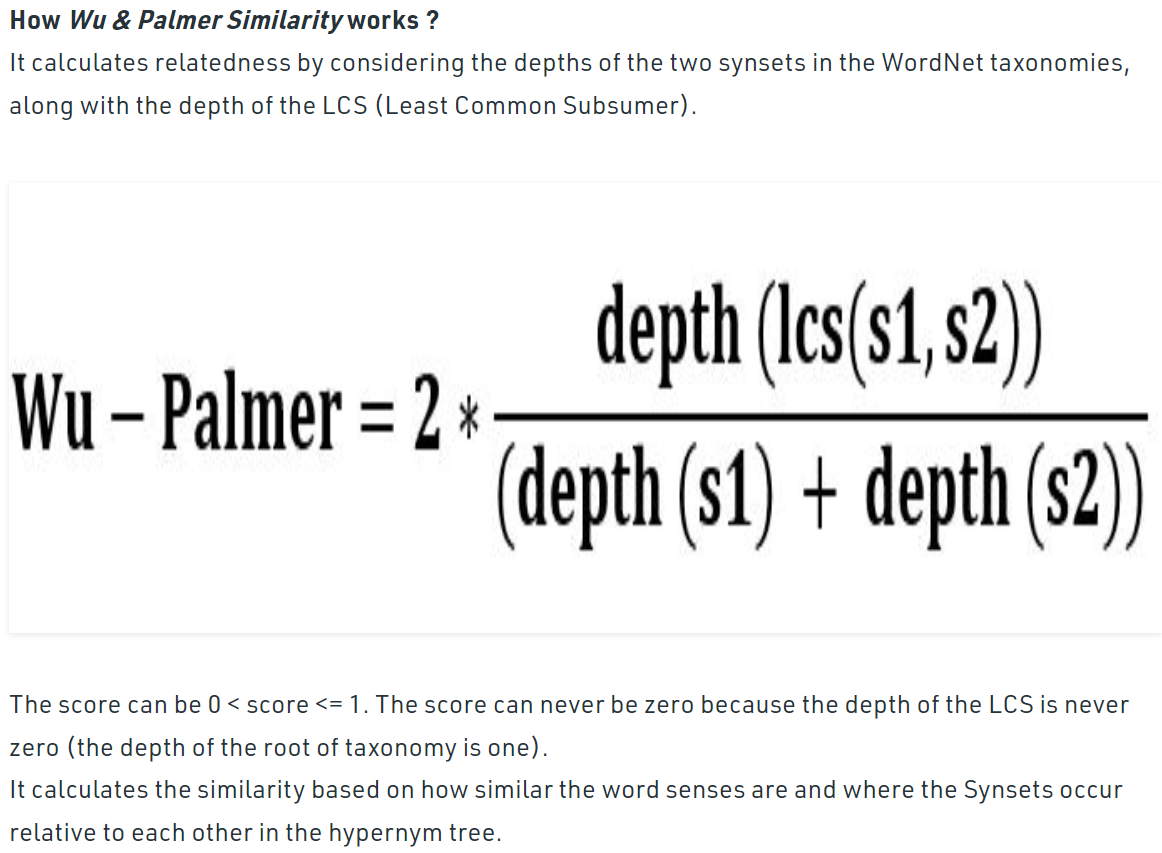

In [177]:
wordnet.wup_similarity(syns[0], syns[1])

0.8235294117647058

In [178]:
wordnet.wup_similarity(syns[0], wordnet.synsets('apple')[0])

0.11764705882352941

Above metric uses shortest path distance between the two Synsets and their common hypernym. 

In [179]:
d1 = syns[0]
d2 = syns[1]
d1,d2

(Synset('faux_pas.n.01'), Synset('slip.n.02'))

In [180]:
d1.hypernym_paths()  # faux pas path

[[Synset('entity.n.01'),
  Synset('abstraction.n.06'),
  Synset('psychological_feature.n.01'),
  Synset('event.n.01'),
  Synset('act.n.02'),
  Synset('nonaccomplishment.n.01'),
  Synset('mistake.n.01'),
  Synset('blunder.n.01'),
  Synset('faux_pas.n.01')]]

In [181]:
d2.hypernym_paths()  # slip path

[[Synset('entity.n.01'),
  Synset('abstraction.n.06'),
  Synset('psychological_feature.n.01'),
  Synset('event.n.01'),
  Synset('act.n.02'),
  Synset('nonaccomplishment.n.01'),
  Synset('mistake.n.01'),
  Synset('slip.n.02')]]

In [182]:
d1.shortest_path_distance(d2)  # go up two from faux pas to mistake, then down one on the slip path to slip

3

In [183]:
common_hypernym_d1 = d1.hypernyms()[0]  # faux pas to blunder is one up the path
common_hypernym_d1

Synset('blunder.n.01')

In [184]:
common_hypernym_d1.shortest_path_distance(d1)

1

In [185]:
common_hypernym_d2 = d2.hypernyms()[0]  # slip to mistake is one up the path
common_hypernym_d2

Synset('mistake.n.01')

In [186]:
common_hypernym_d2.shortest_path_distance(d1)

2

Be careful comparing verbs, as many verbs don't share common hypernyms. Return value would be None 

# Bag of words :

a bag of words approach is used to perform tasks like document classification, i.e. classify articles as sports, science, health, etc...

Some technical terms :
- Document : phrase, paragraph, an entire article
- Corpus : ensemble of documents 

This techniques disregards grammar and word order but maintains term multiplicity, i.e. number of occurrences of terms present. To implement a bag of words model we need to find the vocabulary of the corpus, and calculate the counts each word in our vocabulary appears in each document. This will result in a sparce matrix representation of the corpus.

### Let's look at the steps :

- tokenize
- count occurrences

In [187]:
#Here are the documents we are working with :
docA = 'There is a snake in my boot'
docB = 'There is no place like home'

In [188]:
#We starts by tokenizing the documents :
bowA = docA.split() 
bowB = docB.split()

bowA

['There', 'is', 'a', 'snake', 'in', 'my', 'boot']

In [189]:
#We get our vocabulary from our corpus :
vocab = set(bowA).union(set(bowB))
vocab

{'There',
 'a',
 'boot',
 'home',
 'in',
 'is',
 'like',
 'my',
 'no',
 'place',
 'snake'}

In [190]:
#Create dictionaries to compute the word count :
docADict = dict.fromkeys(vocab, 0)
docBDict = dict.fromkeys(vocab, 0)

docBDict

{'no': 0,
 'There': 0,
 'snake': 0,
 'like': 0,
 'is': 0,
 'a': 0,
 'boot': 0,
 'in': 0,
 'home': 0,
 'place': 0,
 'my': 0}

In [191]:
#We're ready to get the counts in of words in our documents :
for w in bowA:
    docADict[w] += 1

for w in bowB:
    docBDict[w] += 1

#Check the counts
docADict

{'no': 0,
 'There': 1,
 'snake': 1,
 'like': 0,
 'is': 1,
 'a': 1,
 'boot': 1,
 'in': 1,
 'home': 0,
 'place': 0,
 'my': 1}

In [192]:
#Create a dataframe for easier read :
pd.DataFrame([docADict,docBDict])

,no,There,snake,like,is,a,boot,in,home,place,my
0,0,1,1,0,1,1,1,1,0,0,1
1,1,1,0,1,1,0,0,0,1,1,0


Above is one-hot encoding of the data.  

Thankfully, bag of words is something that has been around for a while and there are packages in Python that will take care of all of this for you

In [193]:
from sklearn.feature_extraction.text import CountVectorizer

# Create our CountVectorizer object
vectorizer = CountVectorizer()

#This is the corpus
corpus = ['This is the text of the first document.', 
          'This is the second document text with a longer sentence.', 
          'Number three.', 
          'This is number four.'] 

#Let's create and fit a CountVectorizer object on the corpus
vectorizer.fit(corpus)

CountVectorizer()

In [194]:
#Let's look at the vocabulary of our corpus
print("Number of unique words in our corpus :",len(vectorizer.get_feature_names_out()))
print("The vocabulary :",vectorizer.get_feature_names_out())

Number of unique words in our corpus : 14
The vocabulary : ['document' 'first' 'four' 'is' 'longer' 'number' 'of' 'second' 'sentence'
 'text' 'the' 'this' 'three' 'with']


In [195]:
#We can also look at the dictionary which maps each vocabulary word to its location :
print("The vocabulary :",vectorizer.vocabulary_)

The vocabulary : {'this': 11, 'is': 3, 'the': 10, 'text': 9, 'of': 6, 'first': 1, 'document': 0, 'second': 7, 'with': 13, 'longer': 4, 'sentence': 8, 'number': 5, 'three': 12, 'four': 2}


In [196]:
# Let's create out bag of words
BoW = vectorizer.fit_transform(corpus)
print(BoW)

#First entry is the document. 
#Second entry is the index of the word
#The value is the count

  (0, 11)	1
  (0, 3)	1
  (0, 10)	2
  (0, 9)	1
  (0, 6)	1
  (0, 1)	1
  (0, 0)	1
  (1, 11)	1
  (1, 3)	1
  (1, 10)	1
  (1, 9)	1
  (1, 0)	1
  (1, 7)	1
  (1, 13)	1
  (1, 4)	1
  (1, 8)	1
  (2, 5)	1
  (2, 12)	1
  (3, 11)	1
  (3, 3)	1
  (3, 5)	1
  (3, 2)	1


In [197]:
# Retrieving the matrix in the numpy form
print("The vocabulary :",vectorizer.get_feature_names_out())
print(BoW.toarray())

# Sanity check :
# 'This is the text of the first document.'
# 'This is the second document text with a longer sentence.' 
# 'Number three.'
# 'This is number four.'


# Term-Document matrix
# Word vector
# Document vector

The vocabulary : ['document' 'first' 'four' 'is' 'longer' 'number' 'of' 'second' 'sentence'
 'text' 'the' 'this' 'three' 'with']
[[1 1 0 1 0 0 1 0 0 1 2 1 0 0]
 [1 0 0 1 1 0 0 1 1 1 1 1 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 1 1 0 1 0 0 0 0 0 1 0 0]]


In [198]:
#We can of course create a pandas DataFrame with this information and have a cleaner way to view our data
pd.DataFrame(BoW.todense(), columns = vectorizer.get_feature_names_out())

,document,first,four,is,longer,number,of,second,sentence,text,the,this,three,with
0,1,1,0,1,0,0,1,0,0,1,2,1,0,0
1,1,0,0,1,1,0,0,1,1,1,1,1,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,1,1,0,1,0,0,0,0,0,1,0,0


In [199]:
# Using the vocabulary learned to transform a new document
vectorizer.transform(['My new document.']).toarray()

#[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

## Let's look at a movie review classification example from Kaggle

Data can be found [here](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [200]:
#Let's import some movie reviews :
movie_review = pd.read_csv('IMDB Dataset.csv')
movie_review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [201]:
#Let's first map positive/negative label to a numberic value
movie_review.sentiment = movie_review.sentiment.map({"positive":1, "negative":0})
movie_review.sentiment

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [202]:
#Let's look at how many positive/negative reviews we have :
movie_review.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [203]:
#Package to split the data into training/testing sets
from sklearn.model_selection import train_test_split

#Let's split our data into train/test data
X_train, X_test, y_train, y_test = train_test_split(
    movie_review['review'], 
    movie_review['sentiment'], 
    test_size = 0.3, random_state = 1)

In [204]:
#Check out our train and test data sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35000,) (15000,) (35000,) (15000,)


In [205]:
#Create the bag of words object :
vectorizer = CountVectorizer()

In [206]:
#Let's perform our bag of words model fit on the train and test data :
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#Why do we only transform the X_test data ?....

In [207]:
#The size of out vocabulary is :
len(vectorizer.get_feature_names_out())

88339

In [208]:
#Let's look at a few of the vocabulary words we have in our reviews :
vectorizer.get_feature_names_out()[60000:60100]

array(['polygamy', 'polygon', 'polygram', 'polygraph', 'polymath',
       'polymer', 'polynesia', 'polynesian', 'polyphobia', 'polystyrene',
       'polysyllabic', 'polytheism', 'polytheistic', 'polytheists', 'pom',
       'pomade', 'pomegranate', 'pomegranates', 'pomeii', 'pomeranian',
       'pomerantz', 'pomeranz', 'pommel', 'pommies', 'pomo', 'pomp',
       'pompadour', 'pompadoured', 'pompadours', 'pompeii', 'pompeo',
       'pompom', 'pomposity', 'pompous', 'pompously', 'pompousness',
       'poms', 'pon', 'poncelet', 'poncho', 'pond', 'ponder',
       'ponderance', 'pondered', 'pondering', 'ponderosa', 'ponderous',
       'ponderously', 'ponders', 'ponds', 'pone', 'ponente', 'pong',
       'pongo', 'pongs', 'ponied', 'ponies', 'pons', 'pont', 'ponte',
       'pontecorvo', 'pontevedro', 'ponti', 'pontiac', 'pontiacs',
       'pontificate', 'pontificates', 'pontificating', 'pontification',
       'pontifications', 'pontificator', 'pontin', 'pontins', 'pontius',
       'ponto', 'po

In [209]:
#Let's import a few packages that will allow us to perform a logistic regression and evaluate its performance
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(),X_train, y_train, cv=5)

C:\Users\ddalton\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ddalton\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [210]:
#Looking at the average accuracy score of the different cross validation we get :
print("Our average accuracy is :", round(np.mean(scores)*100,2))

Our average accuracy is : 88.17


In [211]:
#Since we split our data into training and testing sets, let's build a model, train it on the train data
#and then use it to predict the sentiment of the movie reviews in the test data set :
movie_logreg = LogisticRegression()
movie_logreg.fit(X_train,y_train)

C:\Users\ddalton\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [212]:
#Check the accuracy of the model on the 
print("The training score was:", round(movie_logreg.score(X_train,y_train)*100,2))

print("The testing score was:", round(movie_logreg.score(X_test,y_test)*100,2))

The training score was: 97.27
The testing score was: 88.79


In [213]:
#We now want to see the prediction our model makes with the review in the test set
movie_pred = movie_logreg.predict(X_test)

#By looking at the confusion matrix we get a nice summary of how our model performed :
pd.DataFrame(confusion_matrix(y_test, movie_pred), 
             columns=["Positive", "Negative"], 
             index=["Positive", "Negative"])

,Positive,Negative
Positive,6623,898
Negative,783,6696


# TF-IDF : Term Frequency Inverse Document Frequency

As great as bag of words is, it takes into account a lot of words that don't carry a lot of meaning that may occur a lot in most or all documents we are using. We want a way to avoid giving a lot of importance to words that may not help our analysis.

A few key words to know :

- Term Frequency : is the number of times a word appears in a document, divided by the total number of words in said document. Just counting the number of occurrences would give more weight to longer documents, so we are looking at relative counts.
- Document Frequency : is the number of documents in which the word is present
- Inverse Document Frequency : it measures the informativeness of the word w. IDF will give a very low value to the most occurring words like stopwords (yes we eliminate stopwords in the preprocessing step but remember that there is no definitive set of stopwords).

Instead of counting word occurrences we want to calculate the TF-IDF score for words, which is a score a score that represents word importance :

$$tf(w)*idf (w)$$

where :

$tf(w)$ : (total count of the word, w, in the document)/(total number of words in the document)

$idf(w)$ : log((number of documents)/number of documents that contain the word w)





Why do we divide the term frequency by the number of words in the document ?

Why to we take the log in the idf term ?


In [214]:
# Let's first calculate the term frequency of each word (this should remind you of bag of words above)
def termFreq(wDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word,count in wDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

In [215]:
tfdocA = termFreq(docADict, bowA)
tfdocB = termFreq(docBDict, bowB)

tfdocB

{'no': 0.16666666666666666,
 'There': 0.16666666666666666,
 'snake': 0.0,
 'like': 0.16666666666666666,
 'is': 0.16666666666666666,
 'a': 0.0,
 'boot': 0.0,
 'in': 0.0,
 'home': 0.16666666666666666,
 'place': 0.16666666666666666,
 'my': 0.0}

In [216]:
import math

def computeIDF(listDocs):
    #Let's get the number of documents in our corpus
    totDocs = len(listDocs)
    
    #Create a dictionary with our vocabulary and initialize values to 0
    idfDict = dict.fromkeys(listDocs[0].keys(), 0)
    
    #Get a count of the number of documents that contain the word w
    for doc in listDocs:
        for w, val in doc.items():
            if val > 0:
                idfDict[w] += 1
                
    #we now divide totDocs by the number of documents the word appears in and take the log 
    for w, val in idfDict.items():
        idfDict[w] = math.log(totDocs/float(val))
    
    return idfDict

In [217]:
print(docA)
print(docB)

idfs = computeIDF([docADict,docBDict])
idfs

There is a snake in my boot
There is no place like home


{'no': 0.6931471805599453,
 'There': 0.0,
 'snake': 0.6931471805599453,
 'like': 0.6931471805599453,
 'is': 0.0,
 'a': 0.6931471805599453,
 'boot': 0.6931471805599453,
 'in': 0.6931471805599453,
 'home': 0.6931471805599453,
 'place': 0.6931471805599453,
 'my': 0.6931471805599453}

In [218]:
def calcTFIDF(tfBow, idfs):
    tfidf = {}
    for w, val in tfBow.items():
        tfidf[w] = val*idfs[w]
    
    return tfidf

In [219]:
tfidfBowA = calcTFIDF(tfdocA, idfs)
tfidfBowB = calcTFIDF(tfdocB, idfs)

In [220]:
pd.DataFrame([tfidfBowA,tfidfBowB])

,no,There,snake,like,is,a,boot,in,home,place,my
0,0.000000,0.0,0.099021,0.000000,0.0,0.099021,0.099021,0.099021,0.000000,0.000000,0.099021
1,0.115525,0.0,0.000000,0.115525,0.0,0.000000,0.000000,0.000000,0.115525,0.115525,0.000000


In [221]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

firstDoc = 'the lady went took the dog for a walk'
secondDoc = 'the children roasted marshmellows around the fire'

In [222]:
#Get built-in TF-IDF method
vectorizer = TfidfVectorizer()

#This steps learns the vocabulary in the documents and returns the term-document matrix
vectors = vectorizer.fit_transform([firstDoc, secondDoc])
# print(vectors)

#This extracts the vocabulary learned. Used to create the dataframe later.
feature_names = vectorizer.get_feature_names_out()
# print(feature_names)

#This creates a dense matrix of the term-document matrix
dense = vectors.todense()
print(dense)

#Make it into a list so we can create the dataframe
denselist = dense.tolist()

#Store results
df = pd.DataFrame(denselist, columns=feature_names)

[[0.         0.         0.35300279 0.         0.35300279 0.35300279
  0.         0.         0.50232878 0.35300279 0.35300279 0.35300279]
 [0.37729199 0.37729199 0.         0.37729199 0.         0.
  0.37729199 0.37729199 0.53689271 0.         0.         0.        ]]


In [223]:
df

,around,children,dog,fire,for,lady,marshmellows,roasted,the,took,walk,went
0,0.000000,0.000000,0.353003,0.000000,0.353003,0.353003,0.000000,0.000000,0.502329,0.353003,0.353003,0.353003
1,0.377292,0.377292,0.000000,0.377292,0.000000,0.000000,0.377292,0.377292,0.536893,0.000000,0.000000,0.000000


# Explicit and Latent Semantic Analysis 

Explicit and Latent semantic analisys are quite similar with the key difference being that ESA, the concepts are already known and have been labeled, the concepts are considered to already be "manifested". ESA uses prior knowledge of realtionships between words and concepts.

LSA on the other hand does not use prior knowledge and therefore "discovers" the concepts of the data.

We will focus on Latent Semantic Analysis

#### LSA :

For LSA we will need to feed to model a matrix with dimensions m x n ; where m is the number of documents in the corpus and n in the number of words in our vocabulary.

In order to perform the LSA and uncover the concepts hidden in our corpus, we first have to think about how many concepts, k, we want to extract. Since we are performing LSA, we don't know how many concepts there are, therefore the number of concepts is what is called a hyperparameter. 
- A hyperparameter is a parameter that has to be set and fine tuned by the user 

In order to extract the concepts that are hidden in our corpus we have to perform a Singular Value Decomposition (SVD). 

$$X \approx U\Sigma V^T$$

where the different matrices in the SVD decomposition are :
- $U$ : is an m x k matrix. The rows are the documents in our corpus and the columns are the 'concepts'. It is the document to concept similarity matrix.
- $\Sigma$ : is a k x k matrix. Each value represents the strength of each concept. 
- $V$ : is an n x k matrix (there's a transpose so the dimensions work out). The rows are the terms and the columns are the concepts.

SVD finds an orthogonal set of verctors that remain orthogonal when transformed by vector A.

We find Av1 = y1 and Av2 = y2 where v1 and v2 are orthogonal and y1 and y2 are orthogonal.  Writing y1 and y2 as a scalar times unit vectors u1 and u2:

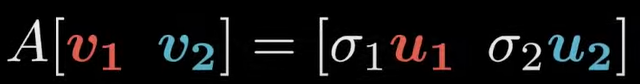
Now change U to be the unit vectors and V to be the vectors v1 and v2.  The sigma vector is teh combination of the unit vectors.

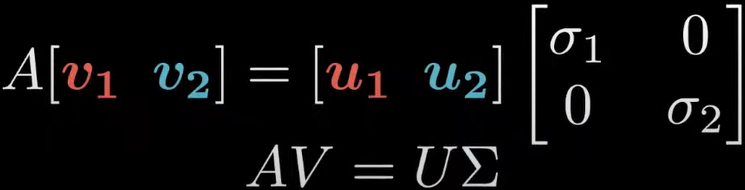
Now we find the eigendecomposition of U and V:
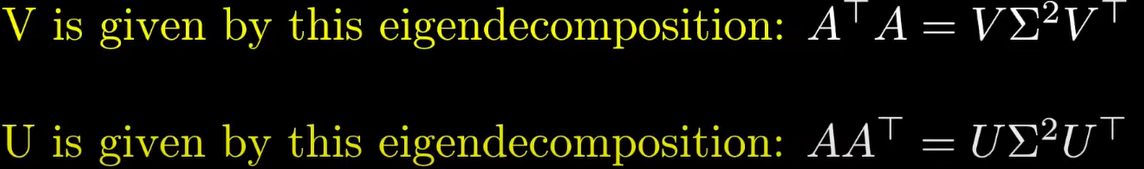

A neat video explaining SVD is available [here](https://www.youtube.com/watch?v=P5mlg91as1c)

Another SVD video in the style of 3Blue, 1Brown: https://www.youtube.com/watch?v=CpD9XlTu3ys

To install textblob: conda install -c conda-forge textblob

In [224]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD

### sklearn truncated SVD:

Dimensionality reduction using truncated SVD (aka LSA).

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

In particular, truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA).

This estimator supports two algorithms: a fast randomized SVD solver, and a “naive” algorithm that uses ARPACK as an eigensolver on X * X.T or X.T * X, whichever is more efficient.

Let's look at Latent Semantic Analysis (LSA) with a neat example from Kaggle found [here](https://www.kaggle.com/rcushen/topic-modelling-with-lsa-and-lda/notebook)

In [225]:
#Read in the data
raw_data = pd.read_csv('abcnews-date-text.csv', parse_dates=[0], infer_datetime_format=True)

#Extract the information that we are interested in and reindex it
reindexed_data = raw_data['headline_text']
reindexed_data.index = raw_data['publish_date']


raw_data.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [226]:
#We create the term-document matrix, remove stopwords and limit the vocabulary to 40000 terms
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
#Extract a small sample :
small_text_sample = reindexed_data.sample(n=10000, random_state=0).values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

#We apply the transformation to our sample data set :
small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)
print('Headline after vectorization: \n{}'.format(small_document_term_matrix[123]))

Headline before vectorization: emerging springboks giant joins tahs
Headline after vectorization: 
  (0, 3813)	1
  (0, 10457)	1
  (0, 4763)	1
  (0, 5979)	1
  (0, 10926)	1


In [227]:
#Here we select an arbitrary number of topics (concepts) we want to uncover :
n_topics = 8 #this is out hyperparameter k

#The truncated SVD performs the dimensionality reduction of our data and will extract 8 concepts from 
#our corpus
lsa_model = TruncatedSVD(n_components=n_topics)

#We fit the LSA model to our data :
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [228]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [229]:
#We extract the most likely concepts that a particular document belongs to :
lsa_keys = get_keys(lsa_topic_matrix)

#We extract the categories and their respective counts :
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [230]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
        
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [231]:
#We extract the top 10 words that belong to each topic :
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

#Look at the top 10 words for each category :
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  police probe crash drug missing attack death woman fatal search
Topic 2:  man charged murder dies jailed court accused guilty bail arrested
Topic 3:  new laws years abc year sets cancer weather sport queensland
Topic 4:  says australian help school plans wa mp power qld iraq
Topic 5:  court face high accused sex trial charges case told faces
Topic 6:  govt qld urged sa work claims vic act closer rejects
Topic 7:  council plan water coast gold takes backs election centre fears
Topic 8:  interview health australia nsw report world hospital wins calls win


# read nltk for word collocation

- http://www.nltk.org/howto/collocations.html
- https://www.nltk.org/

- https://www.nltk.org/book/


# NLP Resources
https://web.stanford.edu/~jurafsky/slp3/

http://web.stanford.edu/class/cs224n/

1 - Ruder website: http://ruder.io/ (all his tutorials are amazing, I suggest you to start from old posts he has on the website)

2 - https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8416973&tag=1 (this covers the most recent advances in DL in NLP)

3 - pretty much everything in this website: https://machinelearningmastery.com/category/natural-language-processing/

4 - This github repo has a lot of good resources: https://github.com/keon/awesome-nlp

5- https://www.youtube.com/watch?v=jfwqRMdTmLo&list=

6- For those of you wanting a nice summery and some deep learning related to NLP, check [here](https://www.kaggle.com/c/word2vec-nlp-tutorial/overview/part-1-for-beginners-bag-of-words)


## Cosine similarity
https://towardsdatascience.com/comparing-documents-with-similarity-metrics-e486bc678a7d

Cosine Similarity
One school of thought suggests considering the angle between the vectors instead of the distance.
Documents, represented as vectors, can be compared by evaluating the angle between two vectors.
The metric that considers the angle of two vectors is the cosine similarity metric.
The formula of cosine similarity is shown below:
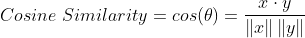

Cosine Similarity (Created By Author)
The cosine similarity value can range from 0 to 1, with 0 representing the lowest similarity and 1 representing the highest similarity.

In [5]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

sentence1 = 'I like eating ice cream on a hot summer day.'
sentence2 = 'Only boring people do not like eating ice cream.'
sentence3 = 'I do not like going out during the summer since it is so hot.'

# returns the cosine similarity value of the two given texts
def compute_cosine_similarity(text1, text2):
    
    # stores text in a list
    list_text = [text1, text2]
    
    # converts text into vectors with the TF-IDF 
    vectorizer = TfidfVectorizer(stop_words='english')
    vectorizer.fit_transform(list_text)
    tfidf_text1, tfidf_text2 = vectorizer.transform([list_text[0]]), vectorizer.transform([list_text[1]])
    #print(tfidf_text1)
    #print(tfidf_text2)
    # computes the cosine similarity
    cs_score = cosine_similarity(tfidf_text1, tfidf_text2)
    
    return np.round(cs_score[0][0],2)

In [6]:
# use function to compute cosine similarity
cosine_similarity12 = compute_cosine_similarity(sentence1,sentence2)
cosine_similarity13 = compute_cosine_similarity(sentence1,sentence3)
cosine_similarity23 = compute_cosine_similarity(sentence2,sentence3)

# print results
print('The cosine similarity of sentence 1 and 2 is {}.'.format(cosine_similarity12))
print('The cosine similarity of sentence 1 and 3 is {}.'.format(cosine_similarity13))
print('The cosine similarity of sentence 2 and 3 is {}.'.format(cosine_similarity23))

The cosine similarity of sentence 1 and 2 is 0.45.
The cosine similarity of sentence 1 and 3 is 0.41.
The cosine similarity of sentence 2 and 3 is 0.12.


### compare homework submissions

Need to strip comments first

In [10]:
import os
strings = [[],[],[],[]]
i = 0
dirname = 'C:/Users/donda/OneDrive - University of Denver/Documents/DU/COMP4448/tfidf/'
for filename in os.listdir(dirname):
    with open(dirname + filename, 'r') as file:
        strings[i] = file.read()
        i += 1
print('The cosine similarity of file 1 and 2 is: ',compute_cosine_similarity(strings[0], strings[1]))
print('The cosine similarity of file 1 and 3 is: ',compute_cosine_similarity(strings[0], strings[2]))
print('The cosine similarity of file 2 and 3 is: ',compute_cosine_similarity(strings[1], strings[2]))
print('The cosine similarity of file 1 and 4 is: ',compute_cosine_similarity(strings[0], strings[3]))
print('The cosine similarity of file 2 and 4 is: ',compute_cosine_similarity(strings[1], strings[3]))

The cosine similarity of file 1 and 2 is:  0.83
The cosine similarity of file 1 and 3 is:  0.92
The cosine similarity of file 2 and 3 is:  0.83
The cosine similarity of file 1 and 4 is:  0.32
The cosine similarity of file 2 and 4 is:  0.36
